# Worksheet 1 - 1b


## Imports


In [1]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.filters import threshold_otsu
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import seaborn as sns
import pandas as pd
from sklearn import decomposition

## Basic Image handling

- read the image
- rescale image
- check dimensions and pixel type
- convert to gray scale
- display image with color maps
- display only one channel color of the image
- display gray image with thresholds
- display image with a mask


In [2]:
in_dir = "../data/PizzaPCA/training"
im_name = "./BigSausage.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(
    in_dir + im_name
)  # im_org data type depends on the image format. usually jpg and png are uint8.

# rescale image
image_rescaled = rescale(im_org, 0.25, anti_aliasing=True, channel_axis=2)

# check dimensions and pixel type
print("image dimensions : ", im_org.shape)
print("pixel type : ", im_org.dtype)

# convert to gray scale
im_gray = color.rgb2gray(im_org)  # dataype = float64

# display image with color maps
io.imshow(
    im_gray, cmap="coolwarm"
)  # cool, hot, pink, copper, coolwarm, cubehelix, and terrain.
plt.title("image with color map")
io.show()

# display only one color channel of the image
im_org_r = im_org[
    :, :, 0
]  # extract all the x pixels, all the y pixels, and channel 0, that is Red
io.imshow(im_org_r)
plt.title("red channel")
io.show()

# display gray image with thresholds. doesn't work if data type is float64
normalized_im_gray = (im_gray * 255).astype(np.uint8)
# or
normalized_im_gray = img_as_ubyte(im_gray)

io.imshow(normalized_im_gray, vmin=100, vmax=200)
plt.title("gray scale image with thresholds")
io.show()

# mask: all pixels above the threshold are set to white
mask = normalized_im_gray > 200
io.imshow(mask)
io.show()

# rows form 0 to 30 are set to 0
im_org[:30] = 0
io.imshow(im_org)
plt.title("first 30 rows set to 0")
io.show()

FileNotFoundError: No such file: '/Users/gaia/DTUhomework/ImageAnal/data/PizzaPCA/training./BigSausage.png'

## Histograms

- display frequency of pixel values in gray image
- display frequency of a channel in color image


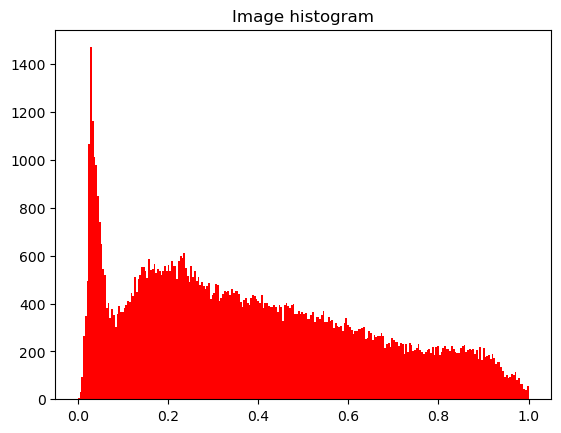

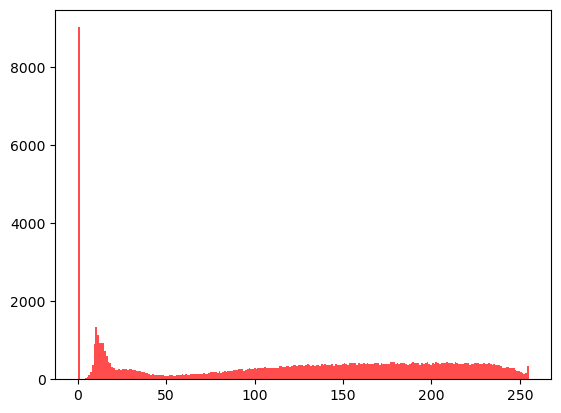

In [4]:
# histogram of a gray scale image (float64)
plt.hist(im_gray.ravel(), bins=256, color="red", alpha=1.0)
plt.title("Image histogram")
io.show()

# histogram of a rgb image (uint8)
# extract a color channel, for example red
red_channel = im_org[:, :, 0].ravel()
h = plt.hist(red_channel, bins=256, color="red", alpha=0.7)
bin_number = 150
number_of_pixels = h[0][150]

## X-ray images and DICOM

- grey level profile of an x ray image
- read and display DICOM image


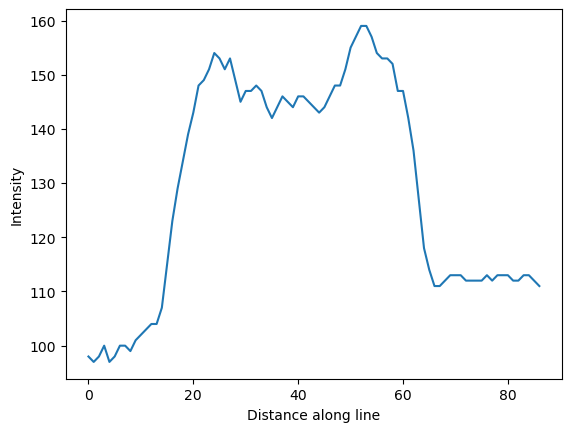

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008, 0020) Study Date                          DA: '20140914'
(0008, 0030) Study Time                          TM: ''
(0008, 0050) Accession N

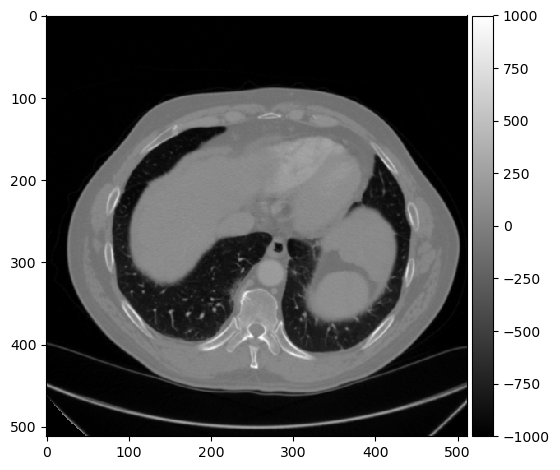

In [5]:
# grey level profile
im_org = io.imread(
    "C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex1-IntroductionToImageAnalysis/data/metacarpals.png"
)
p = profile_line(im_org, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel("Intensity")
plt.xlabel("Distance along line")
plt.show()

# read and display dicom image
in_dir = "C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex1-IntroductionToImageAnalysis/data/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds)
im = ds.pixel_array
io.imshow(
    im, vmin=-1000, vmax=1000, cmap="gray"
)  # pixel values are stored as 16 bit integers and therefore it is necessary to specify which value range that should be mapped to the gray scale spectrum
io.show()

## PCA

- load txt dataset
- compute variance
- scatterplot matrix
- performing of PCA
- plot of explained variance, cumulative variance and data projected on the pcs


Number of features: 4 and number of observations: 50


<Figure size 640x480 with 0 Axes>

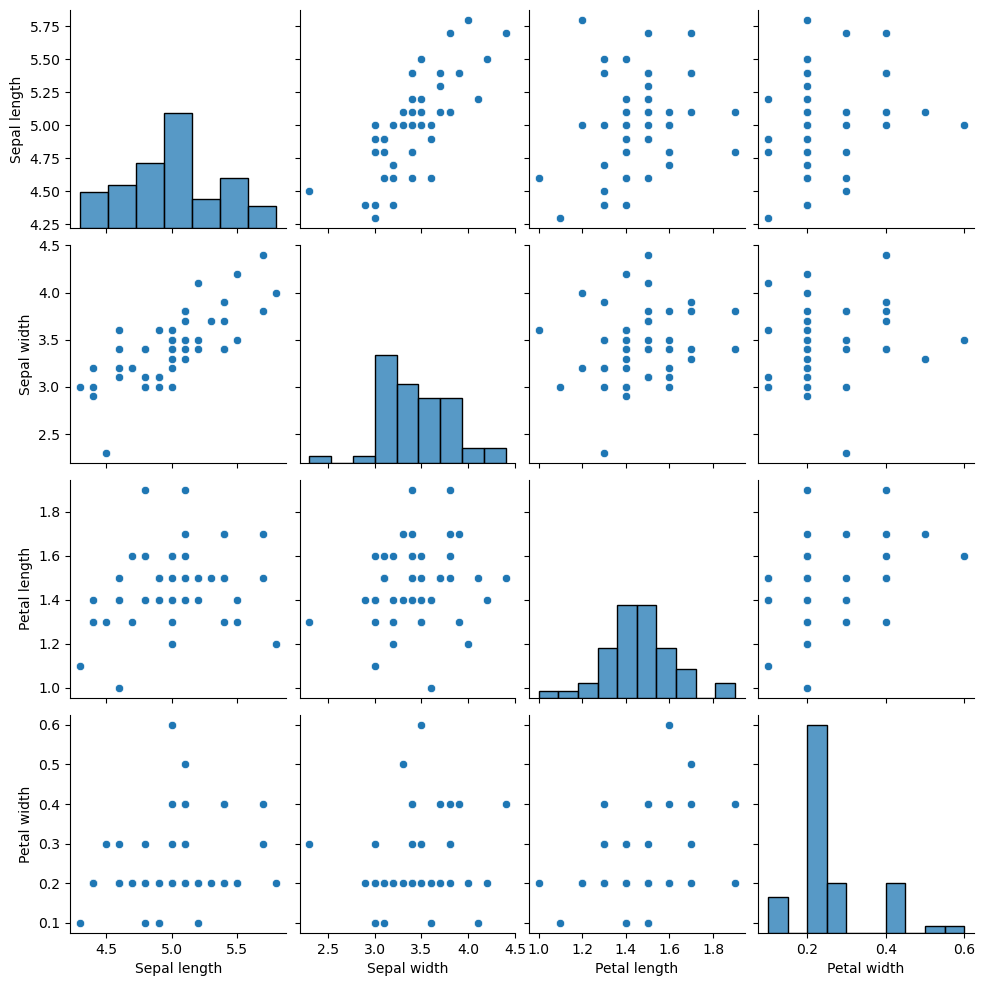

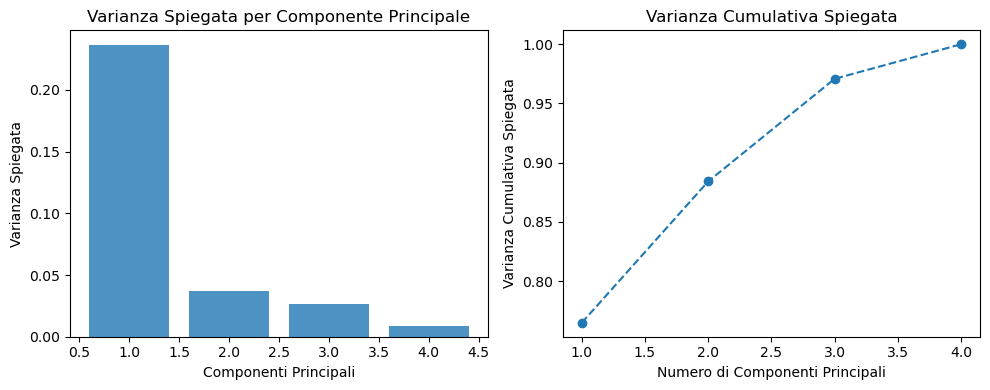

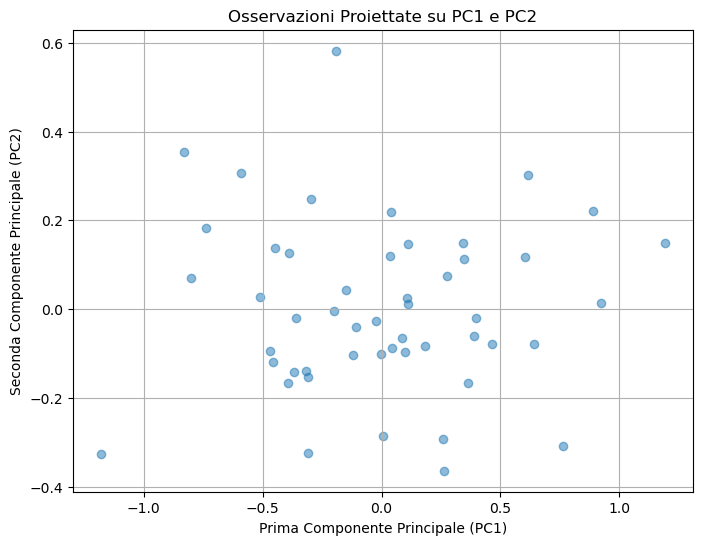

In [10]:
# load txt dataset
in_dir = "C:/Users/Admin/Documents/HCAI/IMAGE_ANALYSIS/exercises/ex1b-PCA/data/"
txt_name = "irisdata.txt"
iris_data = np.loadtxt(in_dir + txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

# compute variance for each feature
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_l = pet_w.var(ddof=1)


# display matrix of scatterplots of pair of features.
plt.figure()  # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(
    x, columns=["Sepal length", "Sepal width", "Petal length", "Petal width"]
)
sns.pairplot(d)
# plt.show()

# perform PCA
data = x  # deve essere di tipo numpy, non gli va bene un panda dataframe
pca = decomposition.PCA()
pca.fit(data)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_  # vector of the principal components

data_transform = pca.transform(
    data
)  # proietta i dati (in questo caso non normalizzati, lungo le componenti principali)

# Plot delle varianze spiegate
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(values_pca) + 1), values_pca, alpha=0.8, align="center")
plt.xlabel("Componenti Principali")
plt.ylabel("Varianza Spiegata")
plt.title("Varianza Spiegata per Componente Principale")

# Plot della varianza cumulativa
plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(exp_var_ratio) + 1),
    np.cumsum(exp_var_ratio),
    marker="o",
    linestyle="--",
)
plt.xlabel("Numero di Componenti Principali")
plt.ylabel("Varianza Cumulativa Spiegata")
plt.title("Varianza Cumulativa Spiegata")

plt.tight_layout()
plt.show()

# Plot delle osservazioni proiettate lungo le prime due PC
plt.figure(figsize=(8, 6))
plt.scatter(data_transform[:, 0], data_transform[:, 1], alpha=0.5)
plt.xlabel("Prima Componente Principale (PC1)")
plt.ylabel("Seconda Componente Principale (PC2)")
plt.title("Osservazioni Proiettate su PC1 e PC2")
plt.grid(True)
plt.show()